In [1]:
# Importing libaraies
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os 


In [2]:
### Importing the dataset
df = pd.read_csv('../input/churn-modelling1/Churn_Modelling1.csv')

## Part 1 - ERD Data and analyze it

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Take a sample of 5
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6778,6779,15613463,Hackett,679,Germany,Female,50,6,132598.38,2,1,1,184017.98,0
8007,8008,15791513,Manfrin,647,France,Male,41,4,138937.35,1,1,1,101617.64,1
3226,3227,15796351,Yao,603,Germany,Male,35,1,105346.03,2,1,1,130379.50,0
9918,9919,15574480,Ubanwa,652,Spain,Male,31,1,132862.59,1,0,0,158054.49,0
6091,6092,15777896,Chukwudi,850,Germany,Female,33,2,83415.04,1,0,1,74917.64,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()  #info() is used to check the Information about the data and the datatypes of each respective attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T #The described method will help to see how data has been spread for numerical values.
              # We can clearly see the minimum value, mean values, different percentile values, and maximum values.


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
#Drop missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:title={'center':'How many people did not leave the bank(0=No,1=Yes)'}, xlabel='Exited', ylabel='count'>

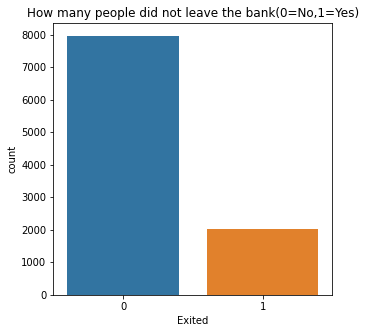

In [10]:
# Visualization
plt.figure(figsize=(5,5))
plt.title('How many people did not leave the bank(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(df['Exited'])

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df["Exited"].value_counts() * 100 / len(df) 

0    79.63
1    20.37
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Exited'>

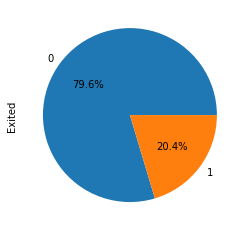

In [13]:
df["Exited"].value_counts().plot.pie(autopct = "%1.1f%%")

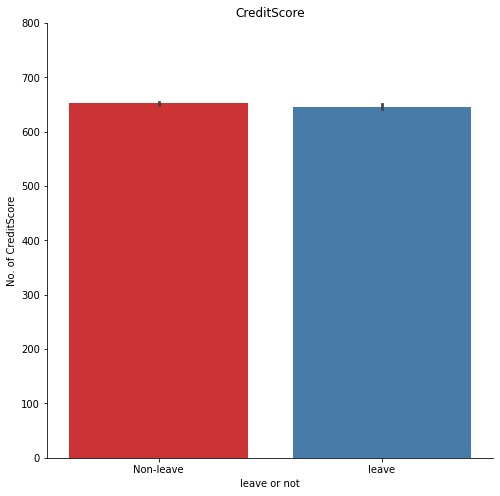

In [14]:
#EDA
plt.figure(figsize=(8,8))
sns.barplot(x='Exited',y='CreditScore',data=df,palette='Set1')
plt.xticks([0,1],['Non-leave','leave'])
plt.ylim(0,800)
plt.xlabel('leave or not')
plt.ylabel('No. of CreditScore')
plt.title("CreditScore")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

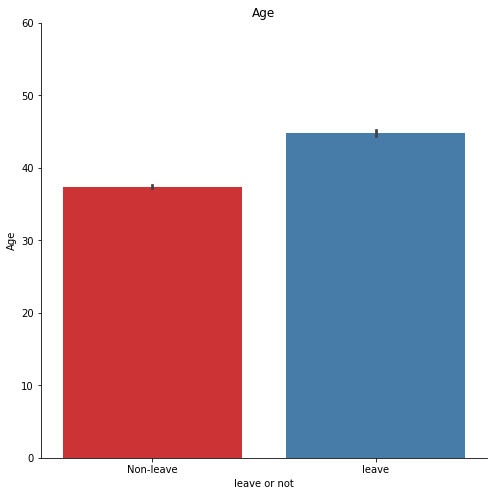

In [15]:
plt.figure(figsize=(8,8))
sns.barplot(x='Exited',y='Age',data=df,palette='Set1')
plt.xticks([0,1],['Non-leave','leave'])
plt.ylim(0,60)
plt.xlabel('leave or not')
plt.ylabel('Age')
plt.title("Age")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

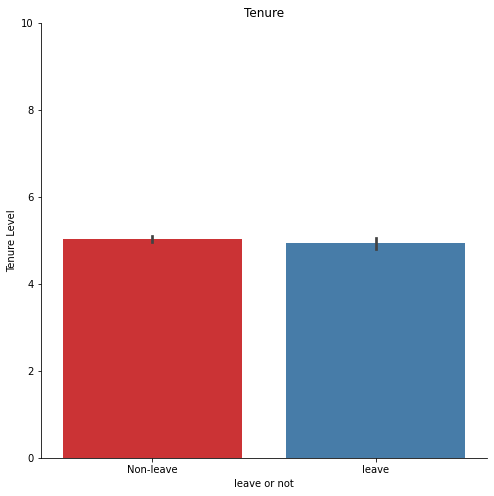

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(x='Exited',y='Tenure',data=df,palette='Set1')
plt.xticks([0,1],['Non-leave','leave'])
plt.ylim(0,10)
plt.xlabel('leave or not')
plt.ylabel('Tenure Level')
plt.title("Tenure")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

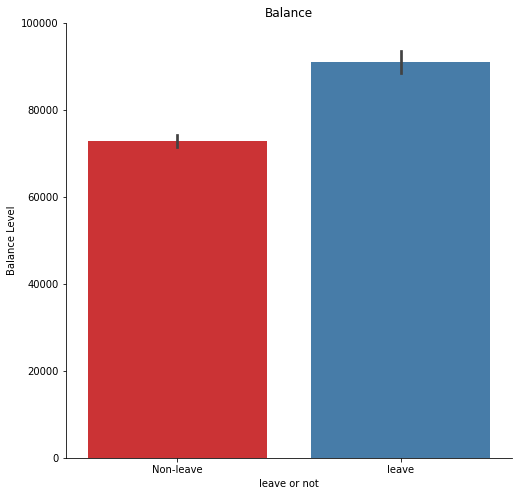

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(x='Exited',y='Balance',data=df,palette='Set1')
plt.xticks([0,1],['Non-leave','leave'])
plt.ylim(0,100000)
plt.xlabel('leave or not')
plt.ylabel('Balance Level')
plt.title("Balance")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

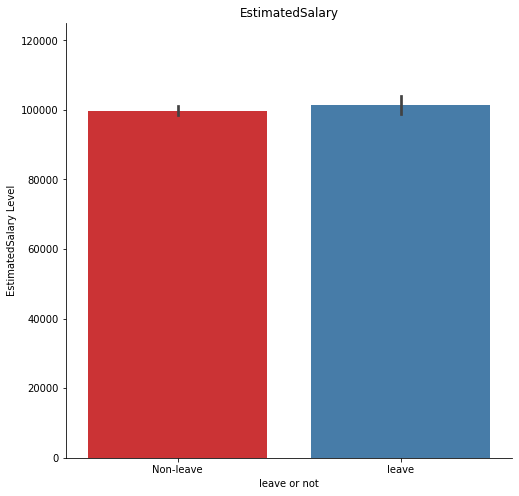

In [18]:
plt.figure(figsize=(8,8))
sns.barplot(x='Exited',y='EstimatedSalary',data=df,palette='Set1')
plt.xticks([0,1],['Non-leave','leave'])
plt.ylim(0,125000)
plt.xlabel('leave or not')
plt.ylabel('EstimatedSalary Level')
plt.title("EstimatedSalary")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

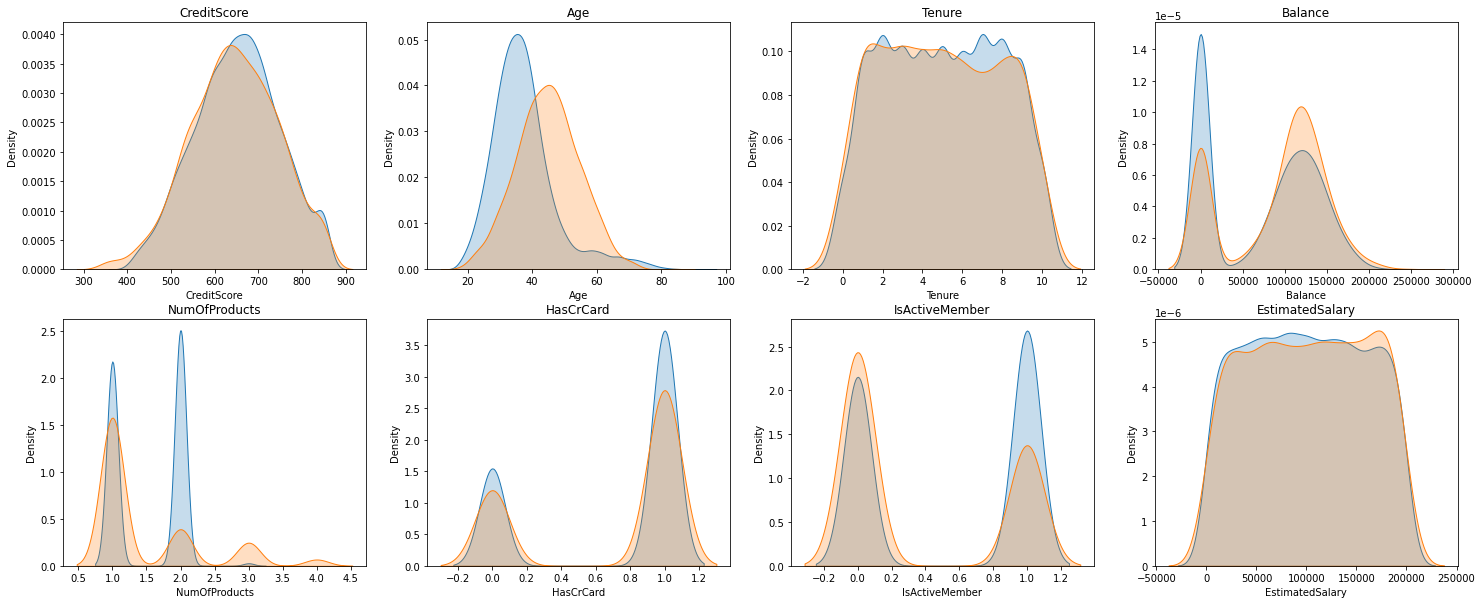

In [19]:
plt.figure(figsize=(25,10))
for i,col in enumerate(df.drop(columns=['Exited','RowNumber','CustomerId','Surname','Geography','Gender']).columns):
    plt.subplot(2, 4, i+1)
    #sns.kdeplot(train[col])
    gr = df.groupby('Exited')[col]
    for label, arr in gr:
        sns.kdeplot(arr, label=label,shade=True)
    plt.title(col)

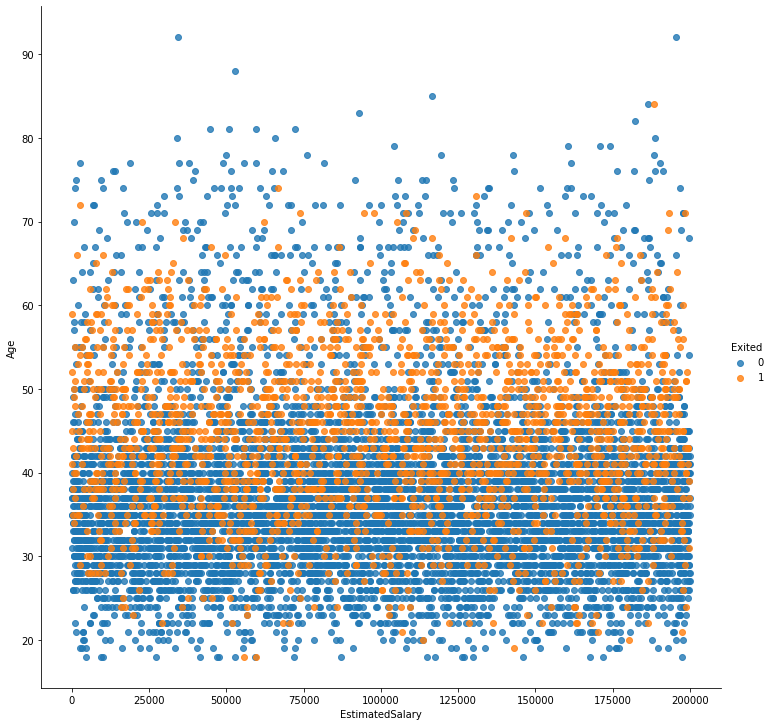

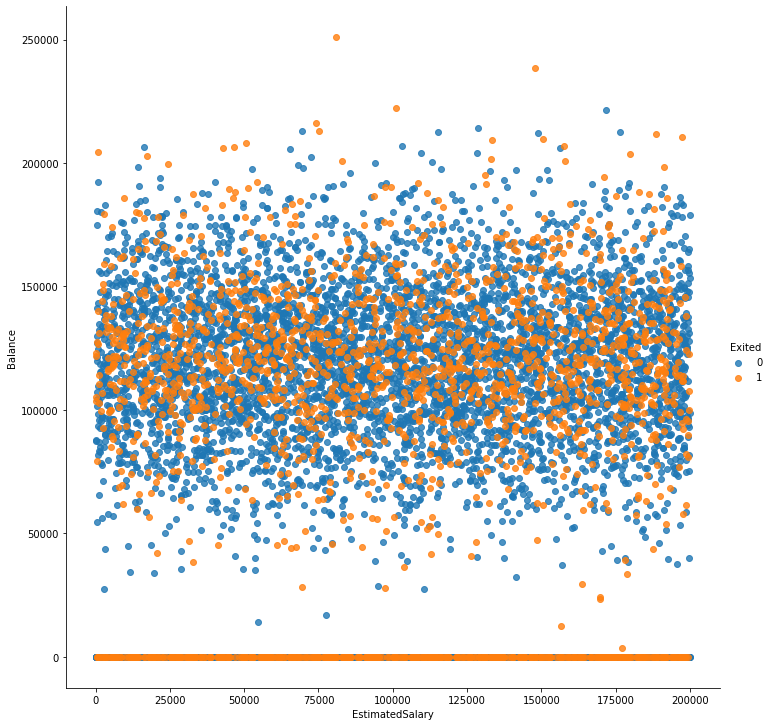

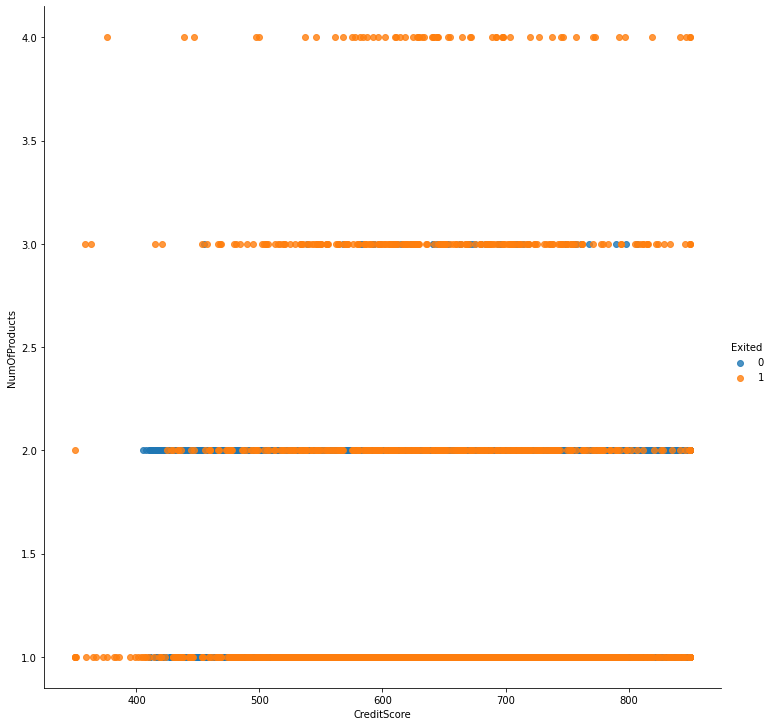

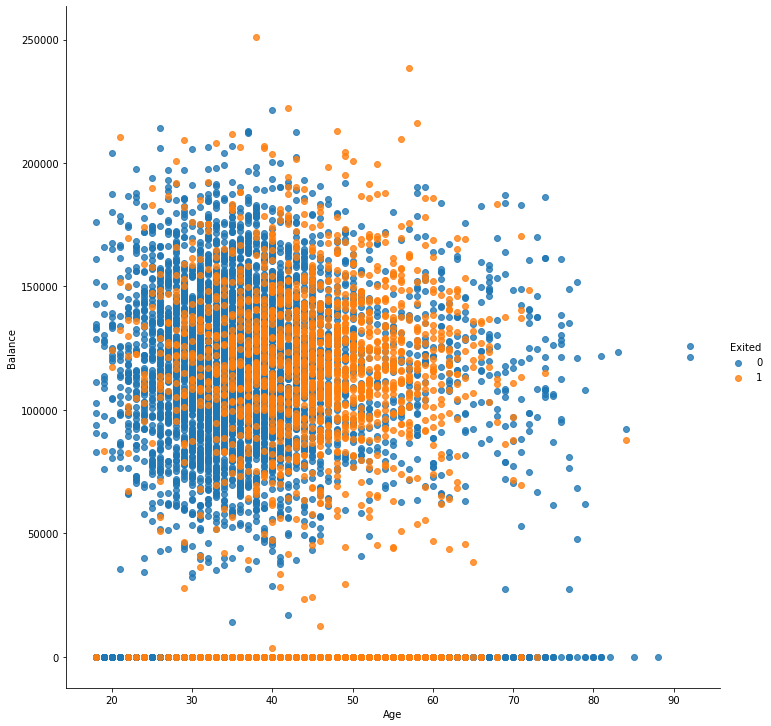

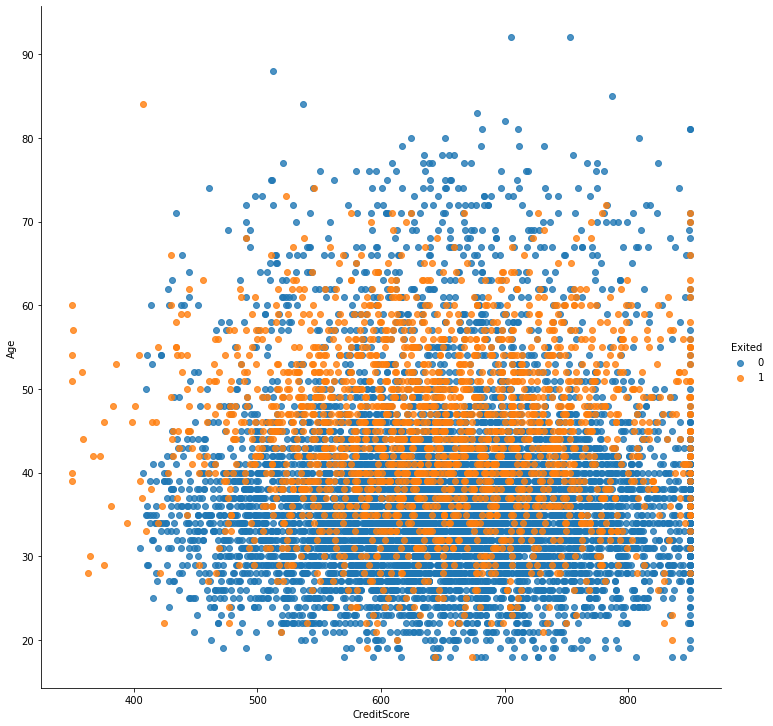

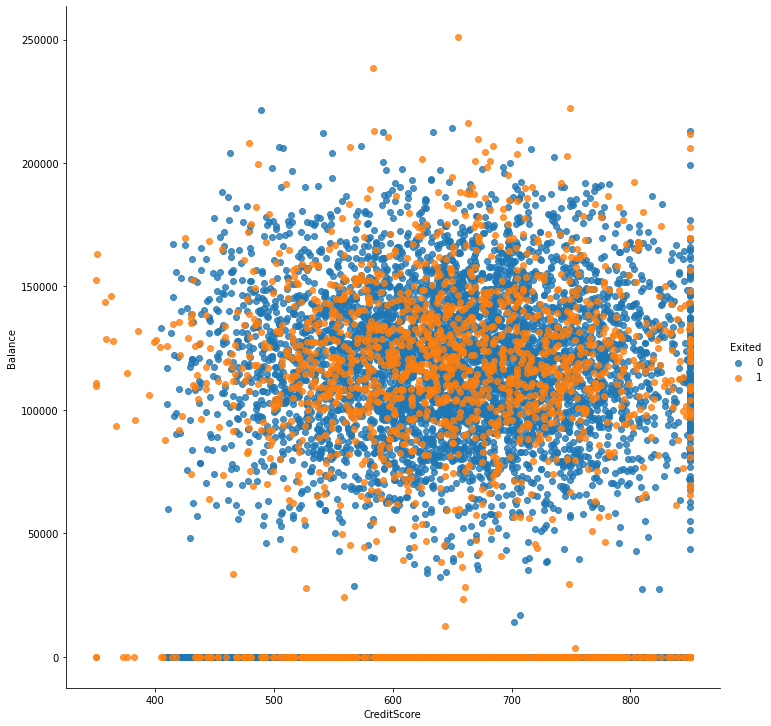

In [20]:
# A scatter plot for show how two variables are related to each other
sns.lmplot("EstimatedSalary", "Age", df, hue='Exited', fit_reg=False, height = 10)
sns.lmplot("EstimatedSalary", "Balance", df, hue='Exited', fit_reg=False, height = 10)
sns.lmplot("CreditScore", "NumOfProducts", df, hue='Exited', fit_reg=False, height = 10)
sns.lmplot("Age", "Balance", df, hue='Exited', fit_reg=False, height = 10)
sns.lmplot("CreditScore", "Age", df, hue='Exited', fit_reg=False, height = 10)
sns.lmplot("CreditScore", "Balance", df, hue='Exited', fit_reg=False, height = 10)


In [21]:
#correlation
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

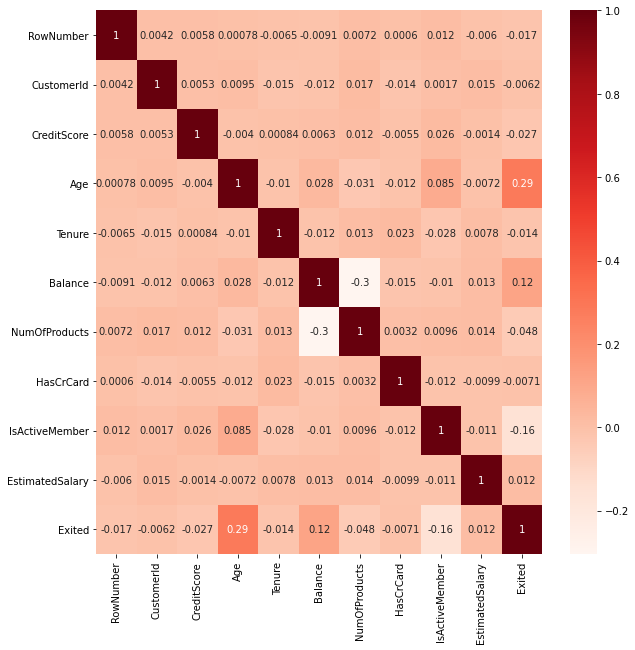

In [22]:
m=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(m,annot=True,cmap="Reds")

In [23]:
### Data Preprocessing
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
print("X is", X)
print("y is" ,y)

X is [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y is [1 0 1 ... 1 1 0]


### Encoding categorical data

In [24]:
#Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [25]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [26]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [28]:
### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (8000, 12)
X_test shape is  (2000, 12)
y_train shape is  (8000,)
y_test shape is  (2000,)


## Part 2 - Building the ANN

In [31]:
### Initializing the ANN
ann = tf.keras.models.Sequential()

In [32]:
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
### Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [34]:
### Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

In [35]:
### Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
### Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.7668
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7933
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7949
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8011
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8059
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8082
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8101
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8128
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8162
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4323 - accura

In [37]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [38]:
### Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1520   75]
 [ 196  209]]


0.8645

In [39]:
#Making the predictions and evaluating the model
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]
